In [1]:
import pandas as pd
import numpy as np

In [2]:
pwd()

'C:\\Users\\varun\\Documents\\app predication project'

Load the data file using pandas. 


In [3]:
df=pd.read_csv("C:\\Users\\varun\\Documents\\app predication project\googleplaystore.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Check for null values in the data. Get the number of null values for each column.

In [8]:
df.replace("?",np.nan,inplace=True)
missing_values=df.isnull()
missing_values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
for column in missing_values.columns.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print("")

App
False    10841
Name: App, dtype: int64

Category
False    10841
Name: Category, dtype: int64

Rating
False    9367
True     1474
Name: Rating, dtype: int64

Reviews
False    10841
Name: Reviews, dtype: int64

Size
False    10841
Name: Size, dtype: int64

Installs
False    10841
Name: Installs, dtype: int64

Type
False    10840
True         1
Name: Type, dtype: int64

Price
False    10841
Name: Price, dtype: int64

Content Rating
False    10840
True         1
Name: Content Rating, dtype: int64

Genres
False    10841
Name: Genres, dtype: int64

Last Updated
False    10841
Name: Last Updated, dtype: int64

Current Ver
False    10833
True         8
Name: Current Ver, dtype: int64

Android Ver
False    10838
True         3
Name: Android Ver, dtype: int64



3.Drop records with nulls in any of the columns. 

In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.count()

App               9360
Category          9360
Rating            9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

1.Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
   1.Extract the numeric value from the column

In [12]:
df["Size"]=df.Size.str.replace("M","000")
df["Size"]=df.Size.str.replace("k","")

In [13]:
df["Size"].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '5.5000', '17000', '39000', '31000', '4.2000', '23000', '6.0000',
       '6.1000', '4.6000', '9.2000', '5.2000', '11000', '24000',
       'Varies with device', '9.4000', '15000', '10000', '1.2000',
       '26000', '8.0000', '7.9000', '56000', '57000', '35000', '54000',
       '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.7000',
       '2.5000', '7.0000', '16000', '3.4000', '8.9000', '3.9000',
       '2.9000', '38000', '32000', '5.4000', '18000', '1.1000', '2.2000',
       '4.5000', '9.8000', '52000', '9.0000', '6.7000', '30000', '2.6000',
       '7.1000', '22000', '6.4000', '3.2000', '8.2000', '4.9000',
       '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000',
       '4.0000', '2.3000', '2.1000', '42000', '9.1000', '55000', '23',
       '7.3000', '6.5000', '1.5000', '7.5000', '51000', '41000', '48000',
     

In [14]:
df["Size"]=df["Size"].replace("Varies with device",np.nan)

In [15]:
df["Size"].dropna(inplace=True)

In [16]:
df["Size"]=df[["Size"]].astype("float")

In [17]:
df["Size"].dtype

dtype('float64')

2.Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [18]:
df["Reviews"]=df[["Reviews"]].astype("float")

In [19]:
df["Reviews"].dtypes

dtype('float64')

3.Installs field is currently stored as string and has values like 1,000,000+. 

        1.Treat 1,000,000+ as 1,000,000
        2.remove ‘+’, ‘,’ from the field, convert it to integer



In [20]:
df["Installs"]=df.Installs.str.replace("+","")
df["Installs"]=df.Installs.str.replace(",","")

C:\Users\varun\AppData\Local\Temp\ipykernel_15688\3617091902.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Installs"]=df.Installs.str.replace("+","")


In [21]:
df["Installs"]=df[["Installs"]].astype("float64")

In [22]:
df["Installs"].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01,
       5.e+00, 5.e+01, 1.e+00])

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


4.Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [24]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [25]:
df["Price"]=df.Price.str.replace("$","")

C:\Users\varun\AppData\Local\Temp\ipykernel_15688\1032755144.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"]=df.Price.str.replace("$","")


In [26]:
df["Price"]=df[["Price"]].astype("float")

In [27]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

5. Sanity checks:

1.Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [28]:
df[[df["Rating"]>5] and df["Rating"]<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

2.Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [30]:
review=df[df["Reviews"] > df["Installs"]]
review

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.0,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,NaN,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.0,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.0,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6.1,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4.2,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.0,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [31]:
review=df[df["Reviews"] > df["Installs"]].index
df.drop(labels=review,inplace=True)

In [32]:
review=df[df["Reviews"] > df["Installs"]]
review

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


3.For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [46]:
new=df.index[((df.Type=='Free')&(df.Price>0))]
len(new)
df.drop(new,axis=0,inplace=True)

5. Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

In [48]:
import seaborn as sns

<Axes: ylabel='Price'>

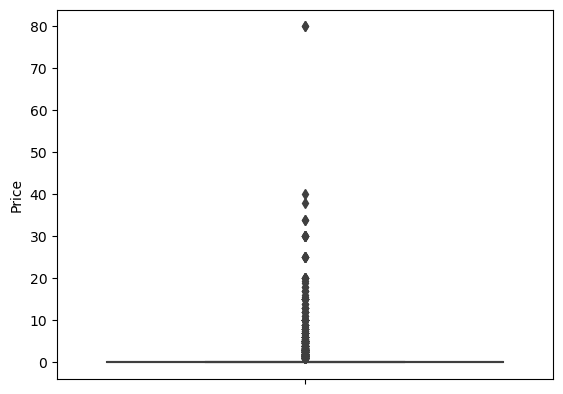

In [74]:
sns.boxplot(y="Price",data=df)

##Yes, There are outliers which are Type != "Free".

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

<Axes: xlabel='Reviews'>

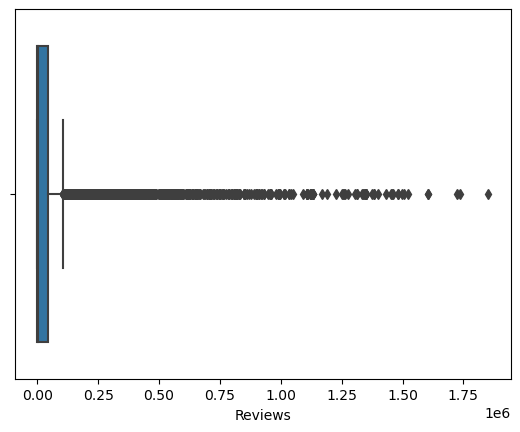

In [77]:
sns.boxplot(x="Reviews",data=df)

###There are higher number of reviews but they are not more than installs of respevtive apps. S0, the values seem right.

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

<Axes: xlabel='Rating', ylabel='Count'>

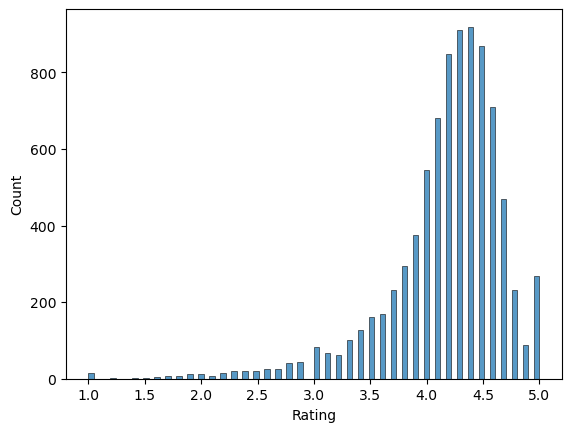

In [78]:
sns.histplot(x="Rating",data=df)

###Maximum number of rating disturbed towards higher rating.

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

<Axes: xlabel='Size', ylabel='Count'>

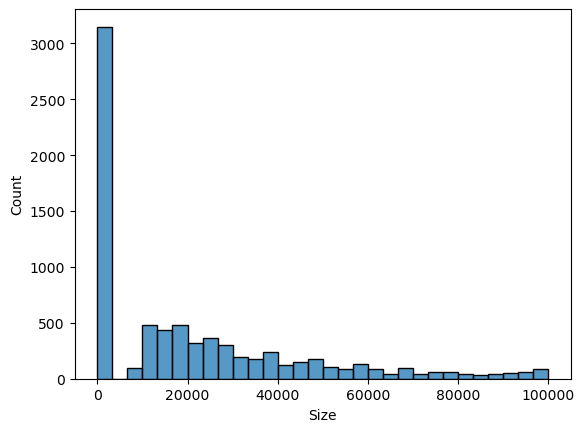

In [52]:
sns.histplot(x="Size",data=df)


#####In the plot of 'Price' and 'Reviews' some outliers are observed. In 'Price', it must be some app which are highly priced, it observed that they are not known apps. In 'reviews', the outliers are the most popular and well-knowed apps like google, chrome, playstore etc.

Those outliers have to drop for the better analysis.

6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?



In [53]:
new=df[df["Price"]>200]
new

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1.5,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.6,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2.9,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


Drop these as most seem to be junk apps

In [54]:
new=df[df["Price"]>200].index
df.drop(labels=new,inplace=True)

In [55]:
new=df[df["Price"]>200]
new

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [56]:
old=df[df["Reviews"]>2000000]
old

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,NaN,1.000000e+08,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386.0,58000.0,1.000000e+08,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098.0,NaN,1.000000e+08,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646.0,71000.0,1.000000e+08,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923.0,25000.0,1.000000e+07,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [57]:
old=df[df["Reviews"]>2000000].index
df.drop(labels=old,inplace=True)

In [58]:
old=df[df["Reviews"]>2000000]
old

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [59]:
df["Installs"].quantile([0.1,0.25,0.50,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [60]:
more=df[df["Installs"]> 10000000]
more

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,5.000000e+07,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080.0,NaN,1.000000e+08,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,NaN,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730.0,NaN,5.000000e+07,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730.0,NaN,5.000000e+07,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136.0,54000.0,5.000000e+07,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613.0,21000.0,5.000000e+07,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895.0,25000.0,5.000000e+07,Free,0.0,Everyone,Racing,"May 23, 2018",1.4.4,4.1 and up
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815.0,NaN,1.000000e+08,Free,0.0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device


In [61]:
more=df[df["Installs"]> 10000000].index
df.drop(labels=more,inplace=True)

In [62]:
more=df[df["Installs"]> 10000000]
more

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

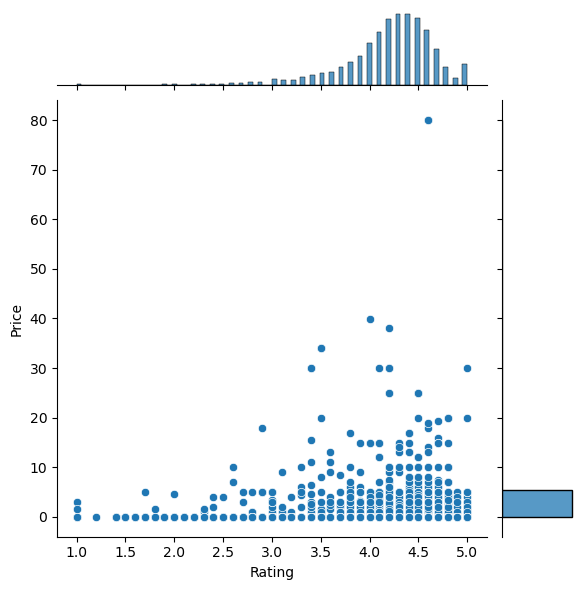

In [64]:
sns.jointplot(x="Rating",y="Price",data=df)



Not think so, because free apps also had high ratings, it shows that price doesn't matters in the ratings.

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

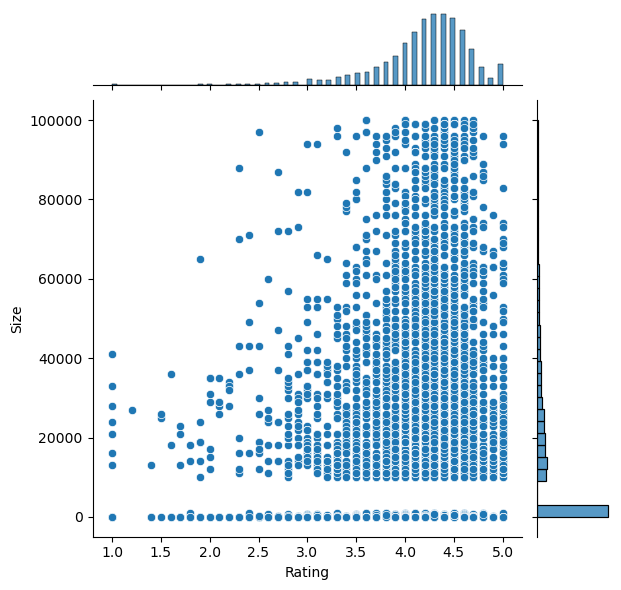

In [65]:
sns.jointplot(x="Rating",y="Size",data=df)

Very small difference, heavier app rated better when compared to low Size app. Because there are no low rate for the heavier Size app.

<Axes: xlabel='Rating', ylabel='Size'>

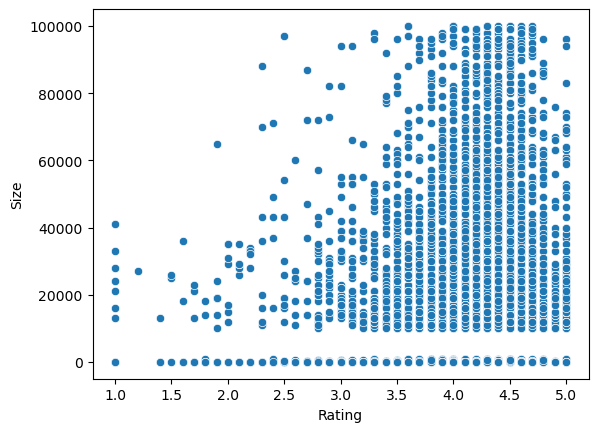

In [79]:
sns.scatterplot(x="Rating",y="Size",data=df)

Very small difference, heavier app rated better when compared to low Size app. Because there are no low rate for the heavier Size app.

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

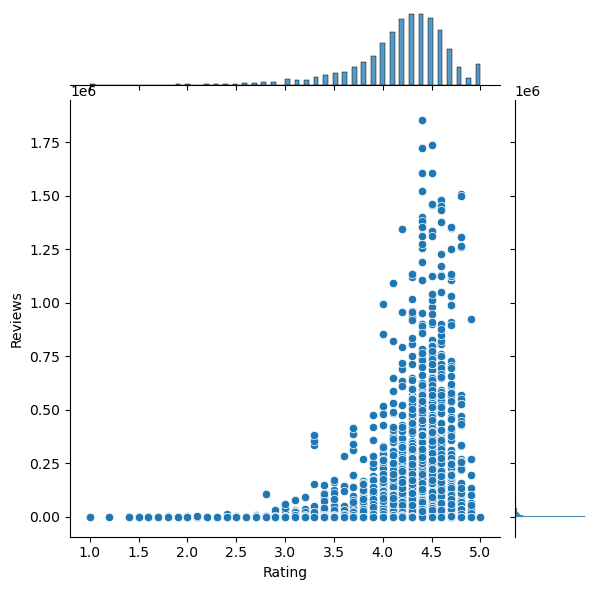

In [67]:
sns.jointplot(x="Rating",y="Reviews",data=df)

By the above plot, it shows that as higher the reviews, the average ratings also better when compare to low reviews app.

In [70]:
import matplotlib.pyplot as plt
import matplotlib

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

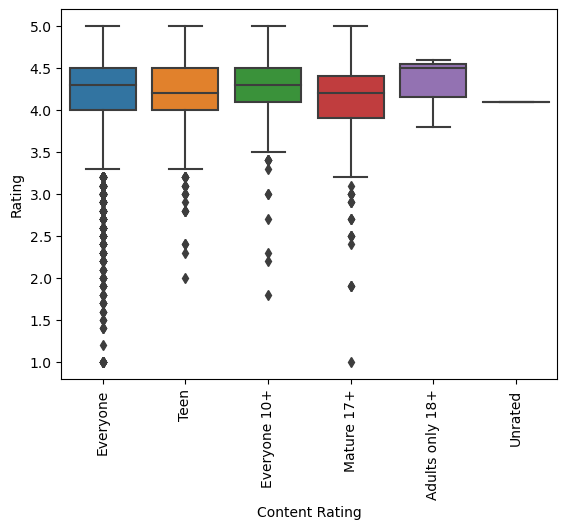

In [73]:
sns.boxplot(y="Rating",x="Content Rating",data=df)
plt.xticks(rotation=90)

There is very small differences in ratings between Content Rating.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

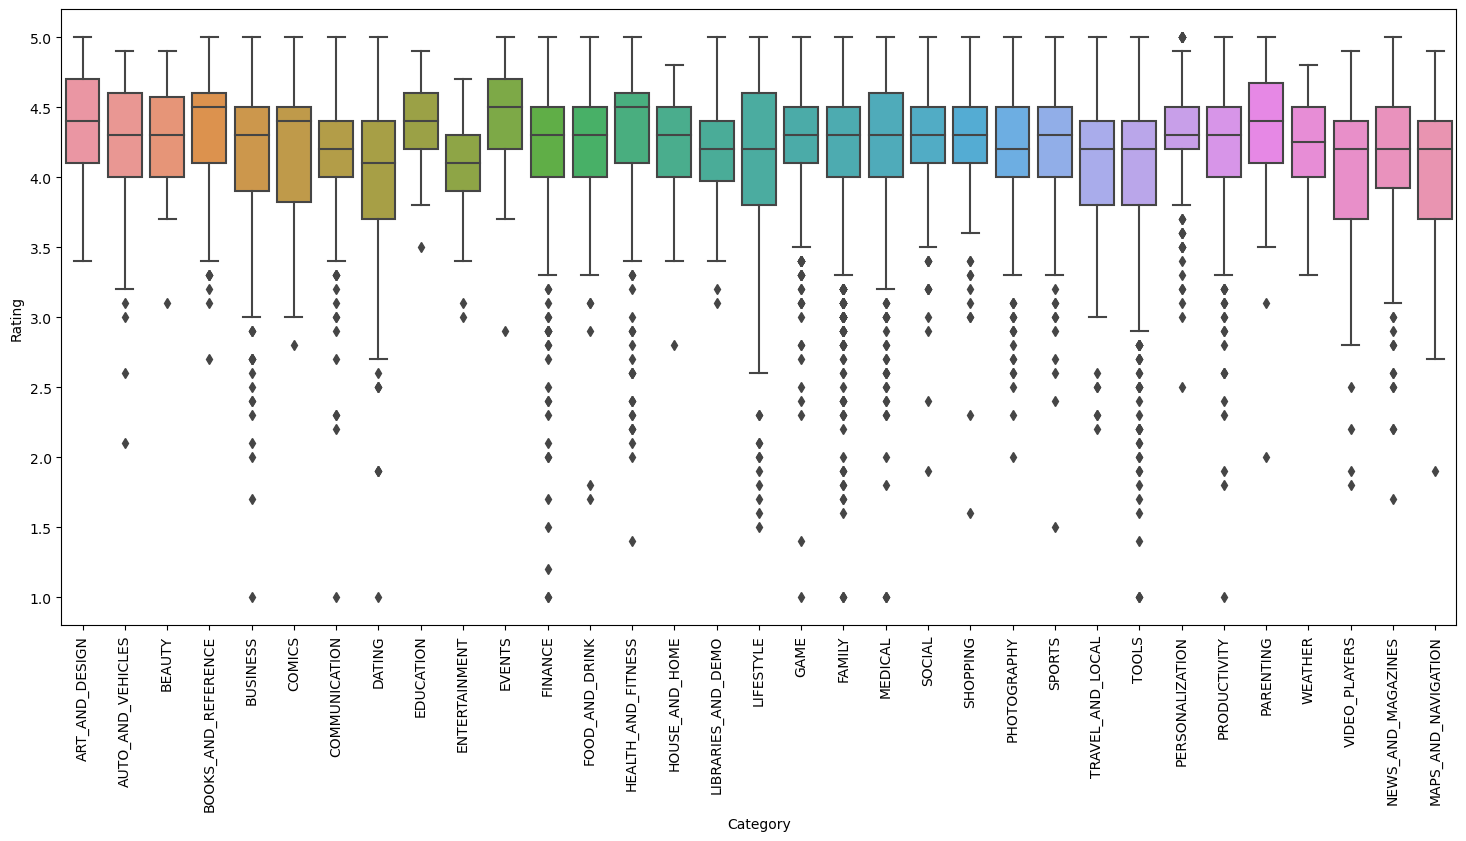

In [71]:
plt.figure(figsize=[18,8])
sns.boxplot(y="Rating",x="Category",data=df)
plt.xticks(rotation=90)

Events has best and consistent ratings, when compared to other genre apps.

8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.



In [154]:
inp1=df.copy()

In [155]:
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,8496.000000,8.496000e+03,7307.000000,8.496000e+03,8496.000000
mean,4.173411,6.566228e+04,19746.553497,2.134612e+06,0.365909
std,0.533032,1.680637e+05,23936.924170,3.525914e+06,2.270653
min,1.000000,1.000000e+00,1.000000,5.000000e+00,0.000000
25%,4.000000,1.340000e+02,5.800000,1.000000e+04,0.000000
50%,4.300000,3.325500e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,4.205000e+04,30000.000000,1.000000e+06,0.000000
max,5.000000,1.852384e+06,100000.000000,1.000000e+07,79.990000


In [156]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [157]:
inp1.Installs.describe()

count    8.496000e+03
mean     2.134612e+06
std      3.525914e+06
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+07
Name: Installs, dtype: float64

In [158]:
inp1.Installs=inp1.Installs.apply(np.log1p)

In [159]:
inp1.Installs

0         9.210440
1        13.122365
2        15.424949
4        11.512935
5        10.819798
           ...    
10834     6.216606
10836     8.517393
10837     4.615121
10839     6.908755
10840    16.118096
Name: Installs, Length: 8496, dtype: float64

In [160]:
inp1.Reviews.describe()

count    8.496000e+03
mean     6.566228e+04
std      1.680637e+05
min      1.000000e+00
25%      1.340000e+02
50%      3.325500e+03
75%      4.205000e+04
max      1.852384e+06
Name: Reviews, dtype: float64

In [161]:
inp1.Reviews=inp1.Reviews.apply(np.log1p)


In [162]:
inp1.Reviews

0         5.075174
1         6.875232
2        11.379520
4         6.875232
5         5.123964
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8496, dtype: float64

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [163]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [164]:
inp1.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [165]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8.7,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,Free,0.0,Everyone,Art & Design


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [166]:
inp2=pd.get_dummies(inp1,drop_first=True)

In [167]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5.6,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
inp2["Size"].isna().sum()

1189

In [169]:
inp2=inp2.dropna()


In [170]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5.6,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
df_train,df_test= train_test_split(inp2,train_size=0.70,random_state=100)

In [173]:
df_train.shape,df_test.shape

((5114, 157), (2193, 157))

In [174]:
df_train

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
6619,2.1,3.496508,9.6,6.908755,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5658,3.1,5.361292,12000.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4112,4.3,8.279951,11000.0,11.512935,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1440,4.4,10.961885,41000.0,13.815512,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7340,4.4,2.397895,7.7,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,3.7,8.477828,35000.0,13.815512,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6012,4.6,3.433987,3.8,6.908755,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8893,4.7,10.126071,7.8,13.122365,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10268,4.5,5.030438,36000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
df_test

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
5766,4.4,14.288103,57000.0,16.118096,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4635,4.3,11.338310,11000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2368,3.6,4.007333,17000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5418,4.2,13.444663,25000.0,16.118096,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7982,4.3,6.904751,10000.0,10.819798,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9615,4.3,12.139938,28000.0,16.118096,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6275,5.0,1.098612,2.7,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502,4.5,12.267295,11000.0,16.118096,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5587,3.5,3.367296,121.0,6.908755,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [176]:
y_train=df_train.pop("Rating")
x_train=df_train

In [177]:
y_train

6619     2.1
5658     3.1
4112     4.3
1440     4.4
7340     4.4
        ... 
91       3.7
6012     4.6
8893     4.7
10268    4.5
8481     3.1
Name: Rating, Length: 5114, dtype: float64

In [178]:
x_train

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
6619,3.496508,9.6,6.908755,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5658,5.361292,12000.0,10.819798,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4112,8.279951,11000.0,11.512935,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1440,10.961885,41000.0,13.815512,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7340,2.397895,7.7,6.216606,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,8.477828,35000.0,13.815512,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6012,3.433987,3.8,6.908755,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8893,10.126071,7.8,13.122365,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10268,5.030438,36000.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
y_test=df_test.pop("Rating")
x_test=df_test

11 . Model building

Use linear regression as the technique

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
lr=LinearRegression()

In [182]:
lr.fit(x_train,y_train)

LinearRegression()

Report the R2 on the train set

12. Make predictions on test set and report R2.

In [183]:
from sklearn.metrics import r2_score

In [184]:
y_train_pred=lr.predict(x_train)
r2_score(y_train,y_train_pred)

0.1558729003101622

In [185]:
y_test_pred=lr.predict(x_test)
r2_score(y_test,y_test_pred)

0.13165792118725617